<img src="assets/jeremy-lapak-CVvFVQ_-oUg-unsplash.png" alt="Python Envs" style="display: block; margin: 0 auto" />

# Learning Python 10 minutes a day #25
## Welcome new Pythonistas!
[Medium article link](https://towardsdatascience.com/learning-python-10-minutes-a-day-18-4718eb73758c)

This is a [series](https://towardsdatascience.com/tagged/10minutespython) of short 10 minute Python articles helping you to get started with Python. I try to post an article each day (no promises), starting from the very basics, going up to more complex idioms. Feel free to contact me on [LinkedIn](https://www.linkedin.com/in/dennisbakhuis/) for questions or requests on particular subjects of Python, you want to know about.

Today is the 25th episode of learning Python 10 minutes a day. If you are here, you can be proud as we have discussed basic, intermediate, and a couple of advanced idioms of the Python language. More than enough to kickstart your Python development career. My first idea was to also add a series of examples to this series. The examples would include data visualization, working with matrices, the amazing Pandas library, and some Scikit-Learn topics. While, I will probably still create those articles, they will be published in a separate series a bit later this year. Feel free to contact me for requests or suggestions.

When finishing an online course, you often get a certificate to share on your LinkedIn. As you have made it this far, I think it is also important to get one for this Series. And to prove the point that you can do everything in Python, we will create a nice certificate ourselves! It would be great if you actually posted this on your LinkedIn and please do not forget to tag me. I would definitely congratulate you on your achievement! Alright, lets create our Pythonic certificate in the most Python way possible! First we need three libraries: matplotlib and pillow for working with images and wget for downloading the required fonts.

In [1]:
!pip install matplotlib pillow wget

# download fonts
import wget

url_font1 = 'https://www.dropbox.com/s/8m7qadmplajdkj2/coolvetica%20condensed%20rg.ttf?dl=1'
url_font2 = 'https://www.dropbox.com/s/fr9wq73v91ui142/High%20Summit.ttf?dl=1'

wget.download(url_font1)
wget.download(url_font2)

'High Summit.ttf'

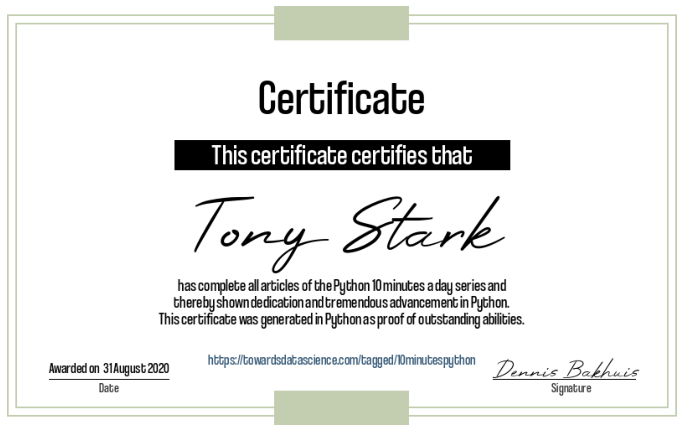

In [2]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
from datetime import date
%matplotlib inline

def create_certificate(name, plot=True):
    # Settings
    border_color = "#C3CEB0"
    xwidth, ywidth = 800, 500
    font1 = 'coolvetica condensed rg.ttf'
    font2 = 'High Summit.ttf'

    # Create emtpy white image
    im = Image.new('RGB', (xwidth, ywidth), (255, 255, 255))
    draw = ImageDraw.Draw(im)

    # Border and blocks
    draw.rectangle((0, 10, xwidth - 1, ywidth - 11), outline=border_color, width=2)
    draw.rectangle((10, 20, xwidth - 11, ywidth - 21), outline=border_color, width=2)
    draw.rectangle((xwidth / 2 - 1 - 0.1 * xwidth, 0,
                    xwidth / 2 - 1 + 0.1 * xwidth, 0.08 * ywidth), fill=border_color, width=2)
    draw.rectangle((xwidth / 2 - 1 - 0.1 * xwidth, ywidth - 1 - 0.08 * ywidth,
                    xwidth / 2 - 1 + 0.1 * xwidth, ywidth - 1), fill=border_color, width=2)

    # Centered text
    def center_text(text, ypos, font_path, size=60, color=(0, 0, 0)):
        font = ImageFont.truetype(font_path, size) 
        text_width, _ = draw.textsize(text, font = font) 
        draw.text(((xwidth - text_width) / 2, ypos), text, font = font, fill=color)

    center_text('Certificate', 70, font1)
    draw.rectangle((200, 160, xwidth-200, 195), fill=(0, 0, 0))
    center_text('This certificate certifies that', 155, font1, size=35, color=(255, 255, 255))
    center_text(name, 215, font2, size=80)
    center_text('has complete all articles of the Python 10 minutes a day series and', 320, font1, size=20)
    center_text('thereby shown dedication and tremendous advancement in Python.', 340, font1, size=20)
    center_text('This certificate was generated in Python as proof of outstanding abilities.', 360, font1, size=20)

    # Off-centered text
    font = ImageFont.truetype(font1, 18) 
    date_string = date.today().strftime(' %d %B %Y')
    draw.text(((50, 420)), 'Awarded on ' + date_string, font = font, fill=(0,0,0))
    font = ImageFont.truetype(font1, 16) 
    draw.text(((110, 445)), 'Date', font = font, fill=(50,50,50))
    draw.text(((650, 445)), 'Signature', font = font, fill=(50,50,50))
    font = ImageFont.truetype(font2, 24) 
    draw.text(((580, 420)), 'Dennis Bakhuis', font = font, fill=(0,0,0))
    draw.line((580, 445, 750, 445), fill=(0,0,0))
    draw.line((50, 445, 193, 445), fill=(0,0,0))

    # Final link
    center_text('https://towardsdatascience.com/tagged/10minutespython', 410, font1, size=18, color='#355876')

    if plot:
        fig, ax = plt.subplots(1, 1, figsize=(12,12))
        _ = ax.set_aspect(1)
        _ = ax.axis('off')
        _ = ax.imshow(im)
    im.save('certificate.png')

create_certificate('Tony Stark')

When getting a bit more into programming, one might come across two big paradigms in coding: functional programming and object-oriented programming (OOP). Until now, what we mostly did is called functional programming. I have not yet found a satisfying all-round definition for both terms. The key difference is that functional programming, as the name suggests, centers around functions and the program structure is like a step-by-step recipe, while OOP centers around the data, which is structured in objects. It is mostly a different way of approaching a problem. There is no real good or bad between the two paradigms as there is in a preference for tennis over soccer. Sometimes, one approach seems easier for a problem, but I am convinced that you could achieve the same results with both methods. Both, OOP and the functional approach are fine in Python.

The core idea of OOP is the abstraction of the program into objects. An object is a structure that combines the data and the code relevant to that particular piece of data. Evangelist of OOP claim that this reduces the amount of repetition and makes the code more readable. I must admit, that the idea is pretty neat and does definitely have some benefits. As a nice starter example, lets create an object for an animal and see how OOP works in Python.

In [11]:
class Animal:
    """
    Our animal class
    """
    def __init__(self, name, height):
        self.name = name
        self.height = height
    
    def description(self):
        print(f'Hi, I am a {self.name}.')
        if self.height < 1:
            print('I am quite tiny!')
        elif self.height < 2:
            print('I am a similar size than you!')
        else:
            print('I am pretty huge!')

animal1 = Animal('Frog', 0.1)
animal2 = Animal('Rhinoceros', 4)

animal1.description()
animal2.description()

Hi, I am a Frog.
I am quite tiny!
Hi, I am a Rhinoceros.
I am pretty huge!


This structure does not look that difficult, but there are some new concepts. To start a class definition, you start with the class keyword, followed by a name. As a convention, class names start capitalized, but from I Python perspective, any name would be fine (but capitalize it anyway please). Similar to a function definition, we have a semicolon and all code that is indented belongs to the definition. It is good practice to provide a DocString to describe the class. In the definition itself, we can now create variables and methods. Methods is the name for functions that are in a class definition.

It is important to know the difference between the class definition and a class instance. The code we have created in the previous example is a class definition. It creates a blueprint for our object. When we want to use that particular type of object, we need to create an instance. After the definition of our Animal class, we create two instances of that class: animal1 and animal2. While the blueprint defines which data and methods are available, it does not contain the data itself. When creating an instance of the class, we create the object that contains the actual data. In our example, animal1 and animal2 are both of the type Animal but they contain different data: Frog for animal1 and Rhinoceros for animal2. You can create many instances of a previously defined class.

When creating an instance of a class, we can call one of Python's special methods: a constructor. We can see that it is special, because its name is surrounded by double-underscores. These, so called dunder-methods are given special treatment in Python. The init dunder-method indicates the constructor, a method that is called when a class instance is created. Methods can take parameters just like regular functions however, classes have one mandatory first parameter: self. Any class method in Python requires this parameter and the reason is that this particular object caries the data of the class. When we define a class in Python, we have a reference to that class. This definition is the same for every object. To have each instance hold their own set of data such that we have a Frog and a Rhinoceros, each class has the self object, which holds the actual data. In the constructor, we add the created variables to this self object. This object is shared between the instance, but not between different instance. Now, we can use that instance data in the other methods we define in the class, such as in the description() method. This is the solution the Python developers came up with for having data at the instance level. While you can define variables at class level, this can result in unwanted results:

In [9]:
class Library:
    books = []

# Public library instance
library = Library()
library.books.append('Harry Potter')

# Another instance
home_book_shelve = Library()
home_book_shelve.books.append('Thrawn trilogy')

# Classes might share at definition level
home_book_shelve.books

['Harry Potter', 'Thrawn trilogy']

This is not a bug but how Python works. The list is defined when the class is defined. Each instance gets a reference to that list and therefore, all instances share that list. This is only the case for mutable objects. immutable objects generally get a new reference when defined, therefore, overwriting the previous reference. Just be mindful when not using the default method of defining all parameters in the constructor (which you generally should use).

In [19]:
animal1 = Animal('Frog', 0.1)
animal2 = Animal('Rhinoceros', 4)

animal1.name, animal2.name

('Frog', 'Rhinoceros')

All variables that we add to the self object are accessible using the dot notation. Generally, all variables that are in an object are called attributes, while all functions are called methods. Both should have unique names and can be accessed using `<object name>.<attribute name>` or `<object name>.<method name>()`. This is the same notation as if any object in Python. Strings and integers are all objects with the same methodology. However, these classes have many more dunder-methods defined. There are special methods that take care of printing the object, if objects are added, and if objects are multiplied. We can also define these and with those make our own rules:

In [50]:
class strange_number:
    def __init__(self, number):
        self.number = number
    
    def __repr__(self):
        return str(self.number)
    
    def __add__(self, other):
        return self.number - other.number
    
number1 = strange_number(5)
number2 = strange_number(2)

print(f'{number1} + {number2} = {number1 + number2}')

5 + 2 = 3


The class has two more dunder-methods. The first takes care of the representation of a the class. If we would simply type the variable name representing the class instance, i.e. number1, it will call the repr dunder-method and returns it representation. This has to be of type string, but using the definition, we can make any representation we like. The second dunder-method defines how to add two objects. It expects as a parameter, next to the mandatory self object, the other object. Technically, this could be any object and we have to test which type it is. For now, we assume it will be of the same type and apply the addition. This can be any definition, even something else as we did. This is very powerful as you can define objects like for example contact cards and using the add function, merge two contacts. We have seen an interesting one when we used Path from the Pathlib module. Path has the divide defined such that it combines the path:

In [55]:
from pathlib import Path
cwd = Path.cwd()
print(cwd / 'README.md')

/home/dennis/Documents/Projects/10minutesPythonCourse/README.md


This was also achieved by defining a dunder-method. For each mathematical operation, there is a dunder-method that can be defined or overloaded. Overloading means that you overwrite an existing method, which can be a regular method or one of the dunder-methods, with a new definition. There are a couple more dunder-methods, for example for iteration related topics. It is not required to know them by hard, but definitely nice to know about their existence.

## Practice for today:
Classes are great as a form of abstraction and especially suited to represent objects we know in real life. Many games need dice to play and there is a huge assortment of dice available. Some only have four faces, while others might have 100 faces.

### Assignment:
Create a Die class that inputs the number of faces as a parameter. It should have a throw() function to have a roll, of course using the correct die, i.e. a four-sided die can only throw 1, 2, 3, or 4. It should also contain a history() method to show the past die rolls() and a nice repr dunder function to tell us which die it is.

Hints:
1. The random module as a randint(a, b) function that generates random numbers between (a, b) including both boundaries. Might be useful for dies ;-).
2. You could use a list to keep track of all previous rolls.

A solution is [posted](https://gist.github.com/dennisbakhuis/c907daec2363e12d0c4ac7b26f126c43) on my Github.

If you have any questions, feel free to contact me through [LinkedIn](https://www.linkedin.com/in/dennisbakhuis/).